In [1]:
import numpy as np
import magpylib as magpy
import numpy as np
from scipy.spatial.transform import Rotation as R
import pandas as pd

In [2]:
## This DataFrame contains values of magnetic flux density affecting two sensors,
## which are positioned at a specific angular distance from each other, analogous to
## the coil arms in a rotating magnetic system.
##
## The sensors measure the magnetic flux in millitesla (mT) during the rotation
## of the system. The rotation is simulated by iteratively changing the orientation of
## the magnetic source.
##
## The resulting magnetic field components (Bx, By, Bz) at the sensor positions
## are stored in a DataFrame for subsequent analysis and visualization.
##

# Note: The simulation values in the DataFrame are not yet validated and are displayed incorrect.
# It has been observed that the `magpy.show` context manager yields divergent values.
# Verification of the simulation parameters required

# UPDATE IS NECESSARY

# majar Update December 2023 magpy !!!! 4.4.0   ---->    v 5.0

#

In [3]:
import os
print(os.getcwd())

/home/fish/urban-vawt/afpm-gen


In [4]:
print(magpy.__version__)


4.5.0


In [5]:
Bxyz_df = pd.read_csv('afpm-gen_Bxyz_dataframe.csv')
# read from csv --- see Details @ afpm-gen_magpy_sim

In [6]:
Bxyz_df.head()


source  path                    sensor  pixel        Bx        By  \
0  sumup (32)     0  Sensor(id=2687822016384)      0 -0.004186 -0.018600   
1  sumup (32)     0  Sensor(id=2687821111616)      0  0.173416  0.212827   
2  sumup (32)     0  Sensor(id=2687821113200)      0  0.005332 -0.015136   
3  sumup (32)     0  Sensor(id=2687821114256)      0 -0.000513  0.016073   
4  sumup (32)     0  Sensor(id=2687788444416)      0  0.410276 -0.080999   

           Bz  
0  -19.747965  
1  -63.919070  
2  -10.961916  
3   -3.035153  
4 -152.123428

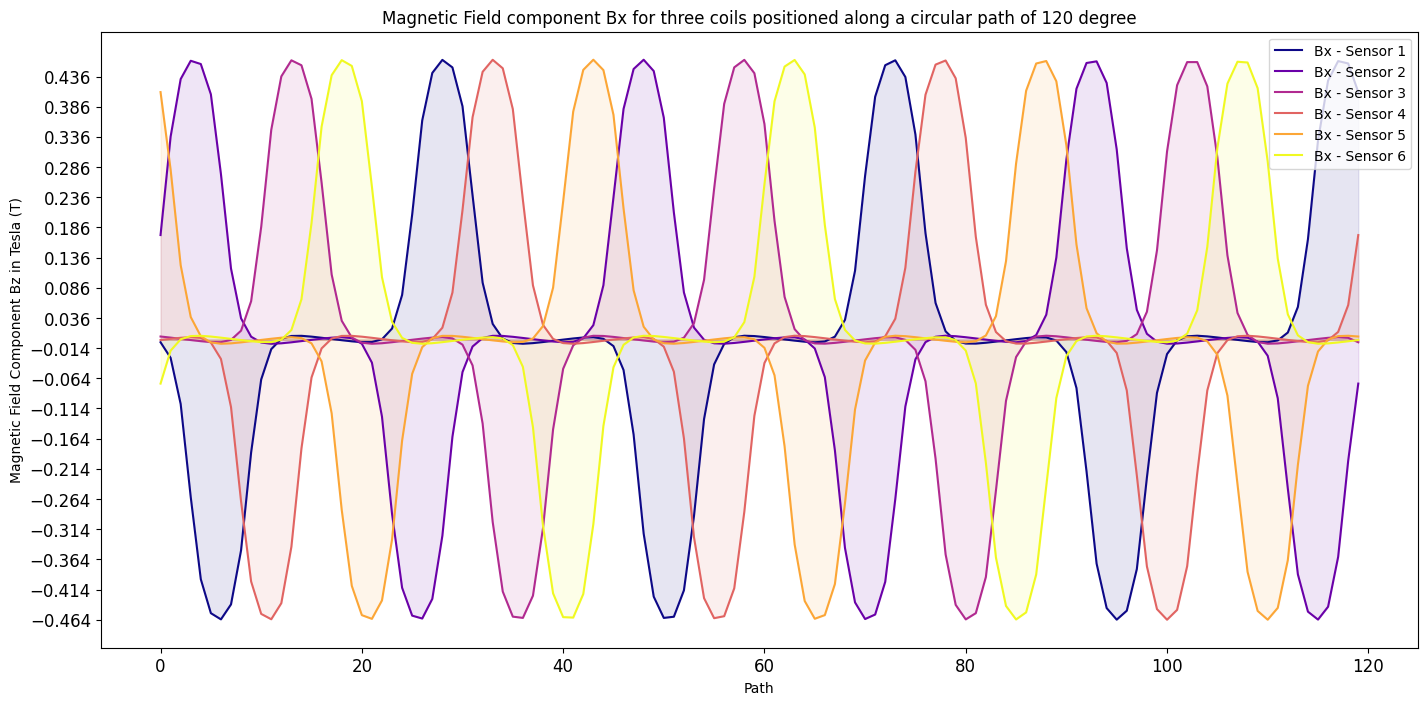

In [7]:
# Visualizes the magnetic field components (Bx) around  circular path 
# corresponding to the rotation of magnets in an axial flux generator

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

Bxyz_df = Bxyz_df.sort_values('path')

plt.figure(figsize=(17, 8))

# Identifying unique sensors
unique_sensors = Bxyz_df['sensor'].unique()

# Colormap for plot
colormap = cm.plasma(np.linspace(0, 1, len(unique_sensors)))  # 'plasma' is good

# Plotting data for each sensor
for i, sensor in enumerate(unique_sensors):
    sensor_data = Bxyz_df[Bxyz_df['sensor'] == sensor]
    plt.plot(sensor_data['path'], sensor_data['Bx'], label=f'Bx - Sensor {i+1}', color=colormap[i])
    # Schraffierte Fläche unter dem Graphen
    plt.fill_between(sensor_data['path'], sensor_data['Bx'], color=colormap[i], alpha=0.1)  

# Adding title, axis labels, and legend
plt.title('Magnetic Field component Bx for three coils positioned along a circular path of 120 degree')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component Bz in Tesla (T)')
plt.legend()

plt.yticks(np.arange(min(Bxyz_df['Bx']), max(Bxyz_df['Bx']), step=0.05))  
plt.tick_params(axis='both', which='major', labelsize=12)  

# Displaying the plot
plt.show()


In [8]:
unique_sensors

array(['Sensor(id=2687822016384)', 'Sensor(id=2687821111616)',
       'Sensor(id=2687821113200)', 'Sensor(id=2687821114256)',
       'Sensor(id=2687788444416)', 'Sensor(id=2687818885168)'],
      dtype=object)

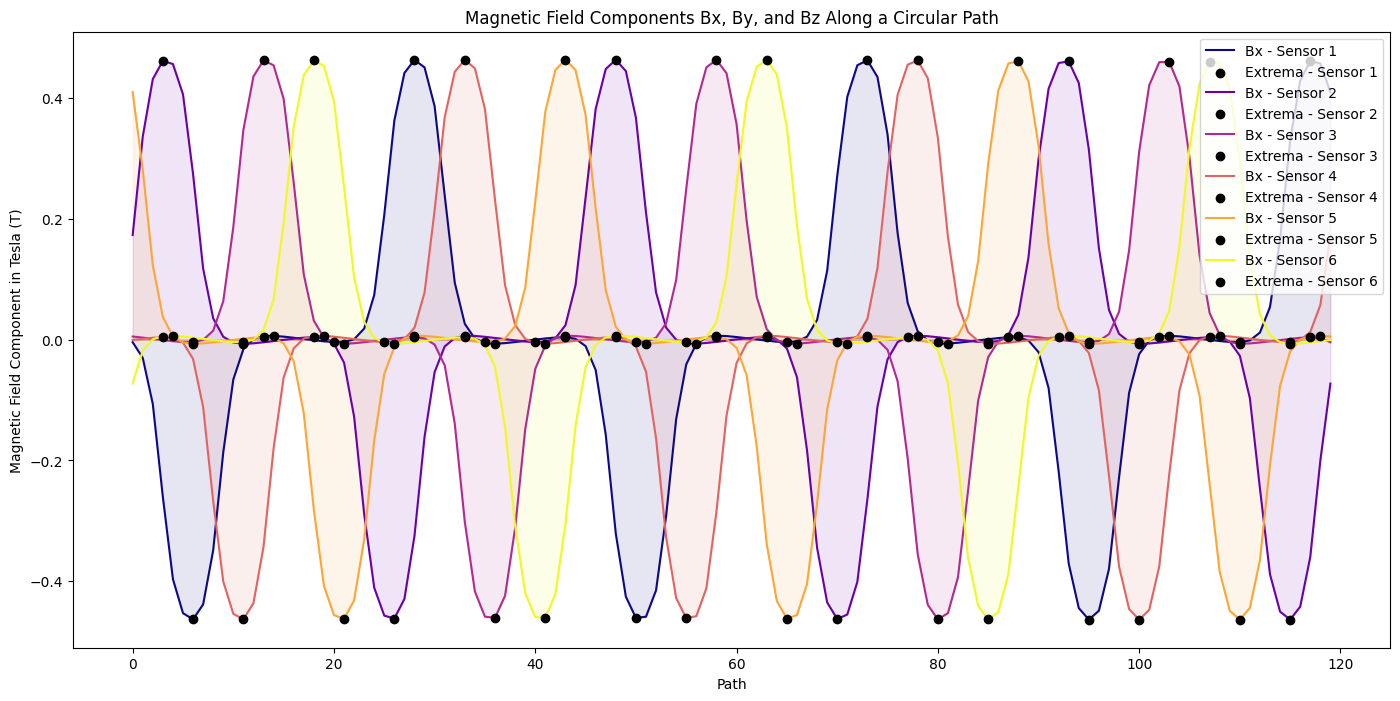

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Initialize the plot figure
plt.figure(figsize=(17, 8))

# Identify unique sensors
unique_sensors = Bxyz_df['sensor'].unique()

# Define color schemes for plotting
colormap_bx = cm.plasma(np.linspace(0, 1, len(unique_sensors)))

# Plot data for each sensor
for i, sensor in enumerate(unique_sensors):
    sensor_data = Bxyz_df[Bxyz_df['sensor'] == sensor]
    plt.plot(sensor_data['path'], sensor_data['Bx'], label=f'Bx - Sensor {i+1}', color=colormap_bx[i])
    plt.fill_between(sensor_data['path'], 0, sensor_data['Bx'], color=colormap_bx[i], alpha=0.1)

    # Calculating extrema (both min and max) for Bx
    
    diff = np.diff(sensor_data['Bx'].values)
    extrema_indices = np.where(np.diff(np.sign(diff)))[0] + 1  # +1 due to the nature of diff
    extrema_values = sensor_data['Bx'].iloc[extrema_indices]
    extrema_paths = sensor_data['path'].iloc[extrema_indices]

    # Plot extrema points for Bx
    plt.scatter(extrema_paths, extrema_values, color='black', label=f'Extrema - Sensor {i+1}', zorder=5)

# Add title and axis labels
plt.title('Magnetic Field Components Bx, By, and Bz Along a Circular Path')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component in Tesla (T)')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [10]:
extrema_values

29     0.006532
71    -0.003998
113    0.463220
161   -0.006661
203    0.004233
251   -0.460376
293    0.006572
335   -0.004209
383    0.463506
431   -0.006485
467    0.003999
515   -0.463509
563    0.006651
605   -0.004210
647    0.460585
695   -0.006610
Name: Bx, dtype: float64

In [11]:
unique_sensors

array(['Sensor(id=2687822016384)', 'Sensor(id=2687821111616)',
       'Sensor(id=2687821113200)', 'Sensor(id=2687821114256)',
       'Sensor(id=2687788444416)', 'Sensor(id=2687818885168)'],
      dtype=object)

In [12]:

sensor_id = 'Sensor(id=2687822016384)'

#
#
#  INSERT RIGHT SENSOR ID FROM ABOVE
#
#

# New DataFrame  'path' und 'Bx' for one sensor
single_df = Bxyz_df[Bxyz_df['sensor'] == sensor_id][['path', 'Bx']]


single_df.head()


path        Bx
0      0 -0.004186
6      1 -0.030024
12     2 -0.106552
18     3 -0.260816
24     4 -0.396808

In [13]:
single_df

path        Bx
0       0 -0.004186
6       1 -0.030024
12      2 -0.106552
18      3 -0.260816
24      4 -0.396808
..    ...       ...
690   115  0.330241
696   116  0.429406
702   117  0.461690
708   118  0.457726
714   119  0.410276

[120 rows x 2 columns]

In [14]:
import pandas as pd
single_df.to_csv('single_sensor_dataframe.csv')  

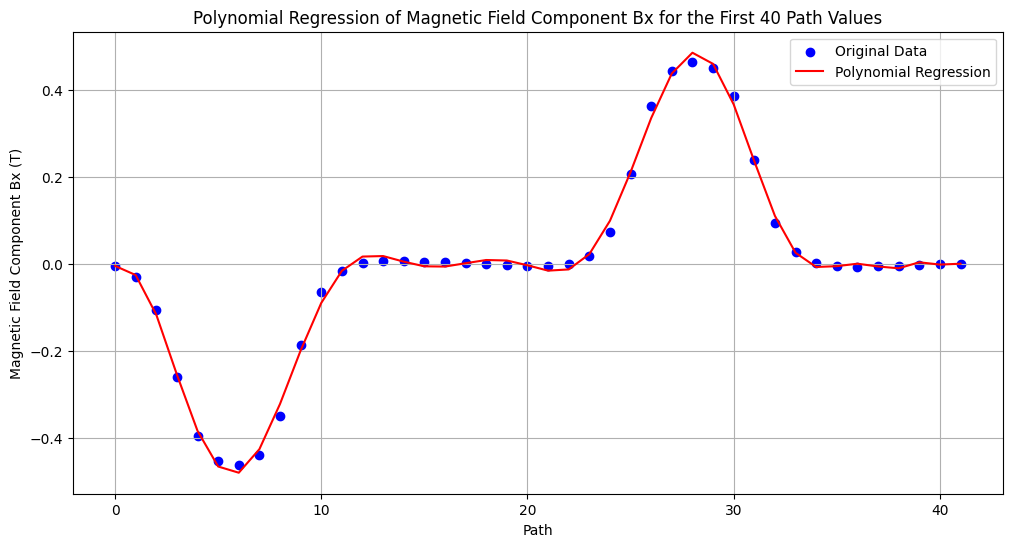

array([ 4.66530928e-19, -1.46918086e-16,  2.08113143e-14, -1.75153255e-12,
        9.74670845e-11, -3.77695074e-09,  1.04610821e-07, -2.09393406e-06,
        3.03274307e-05, -3.16207424e-04,  2.35385290e-03, -1.23686355e-02,
        4.42952378e-02, -9.31588469e-02,  6.34643621e-02, -2.52927037e-02,
       -4.78774791e-03])

In [15]:
# This Python program performs a polynomial regression on a dataset that represents the magnetic field component Bx along a path variable.
# The regression is used to create a function that describes the relationship between the path and Bx.
# A polynomial of the          ########## 16th degree ##########        is used to achieve a high degree of accuracy in fitting the data.
# The dataset is limited to the first 40 path values and then supplemented by an additional point for path value 41, where Bx is assumed to be 0.
# This is to reflect the periodic nature of the data.
# A plot is created that shows both the original data points and the resulting regression curve.
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('sensor_dataframe.csv') # manually zero-ed the 41st value Bx for periodic behavior

# Limit the DataFrame to the first 40 path values
df_40 = df[df['path'] < 41]

# Extract the values for 'path' and 'Bx'
x_values_40 = df_40['path']
y_values_40 = df_40['Bx']

# Add the value for path 41, since the pattern is periodic
#  pandas.concat for selecting values
x_values_40 = pd.concat([x_values_40, pd.Series(41)])
y_values_40 = pd.concat([y_values_40, pd.Series(0)])

# Perform polynomial regression
# Choose the degree of the polynomial (here: 16) for regression
degree = 16
coefficients_40 = np.polyfit(x_values_40, y_values_40, degree)
polynomial_function_40 = np.poly1d(coefficients_40)

# Calculate y-values with the polynomial function
y_pred_40 = polynomial_function_40(x_values_40)

# Create a plot of the original data and polynomial regression
plt.figure(figsize=(12, 6))
plt.scatter(x_values_40, y_values_40, color='blue', label='Original Data')
plt.plot(x_values_40, y_pred_40, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression of Magnetic Field Component Bx for the First 40 Path Values')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component Bx (T)')
plt.legend()
plt.grid(True)
plt.show()

# Return the coefficients of the polynomial function
coefficients_40


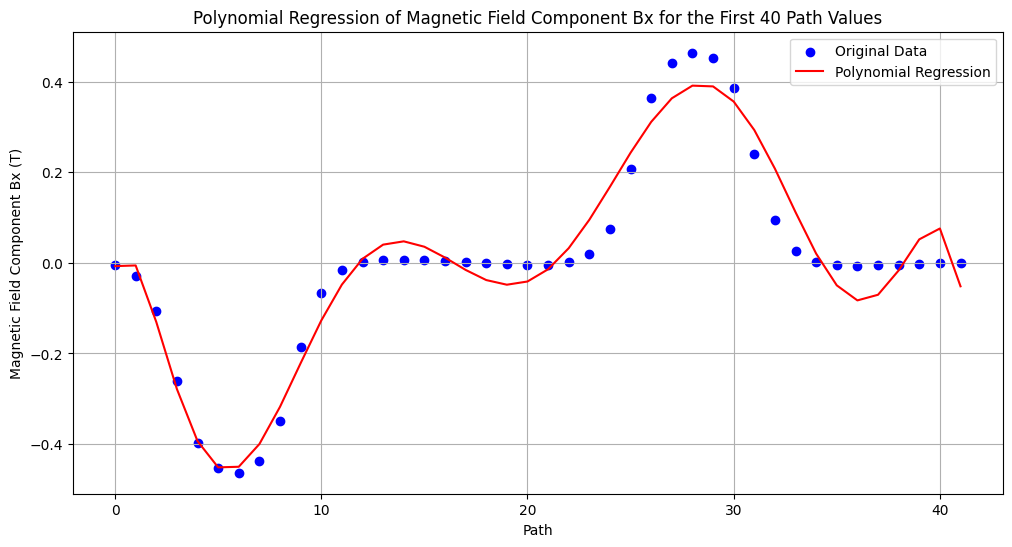

array([-5.08033557e-10,  8.32360168e-08, -5.50713957e-06,  1.87930992e-04,
       -3.49220195e-03,  3.39002844e-02, -1.43053947e-01,  1.13949692e-01,
       -7.35370673e-03])

In [16]:
# This Python program performs a polynomial regression on a dataset that represents the magnetic field component Bx along a path variable.
# The regression is used to create a function that describes the relationship between the path and Bx.
# A polynomial of the     ########### 8th degree ##############   is used to achieve a high degree of accuracy in fitting the data.
# The dataset is limited to the first 40 path values and then supplemented by an additional point for path value 41, where Bx is assumed to be 0.
# This is to reflect the periodic nature of the data.
# Subsequently, a plot is created that shows both the original data points and the resulting regression curve.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('sensor_dataframe.csv')

# Limit the DataFrame to the first 40 path values
df_40 = df[df['path'] < 41]

# Extract the values for 'path' and 'Bx'
x_values_40 = df_40['path']
y_values_40 = df_40['Bx']

# Add the value for path 41, since the pattern is periodic
# Using pandas.concat instead of append due to DeprecatedWarning
x_values_40 = pd.concat([x_values_40, pd.Series(41)])
y_values_40 = pd.concat([y_values_40, pd.Series(0)])

# Perform polynomial regression
# Choose the degree of the polynomial (here: 16) for regression
degree = 8
coefficients_40 = np.polyfit(x_values_40, y_values_40, degree)
polynomial_function_40 = np.poly1d(coefficients_40)

# Calculate y-values with the polynomial function
y_pred_40 = polynomial_function_40(x_values_40)

# Create a plot of the original data and polynomial regression
plt.figure(figsize=(12, 6))
plt.scatter(x_values_40, y_values_40, color='blue', label='Original Data')
plt.plot(x_values_40, y_pred_40, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression of Magnetic Field Component Bx for the First 40 Path Values')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component Bx (T)')
plt.legend()
plt.grid(True)
plt.show()

# Return the coefficients of the polynomial function
coefficients_40


In [17]:
unique_sensors

array(['Sensor(id=2687822016384)', 'Sensor(id=2687821111616)',
       'Sensor(id=2687821113200)', 'Sensor(id=2687821114256)',
       'Sensor(id=2687788444416)', 'Sensor(id=2687818885168)'],
      dtype=object)

In [18]:
import pandas as pd

sensor_1_id = 'Sensor(id=2687822016384)'
sensor_2_id = 'Sensor(id=2687821111616)'


duo_df = Bxyz_df[Bxyz_df['sensor'].isin([sensor_1_id, sensor_2_id])]


print(duo_df.head())

        source  path                    sensor  pixel        Bx        By  \
0   sumup (32)     0  Sensor(id=2687822016384)      0 -0.004186 -0.018600   
1   sumup (32)     0  Sensor(id=2687821111616)      0  0.173416  0.212827   
7   sumup (32)     1  Sensor(id=2687821111616)      0  0.336440  0.196895   
6   sumup (32)     1  Sensor(id=2687822016384)      0 -0.030024 -0.071707   
12  sumup (32)     2  Sensor(id=2687822016384)      0 -0.106552 -0.169424   

            Bz  
0   -19.747965  
1   -63.919070  
7  -131.544541  
6    -5.606513  
12   33.643446  


In [30]:
import pandas as pd
duo_df.to_csv('duo_sensor_dataframe.csv')  

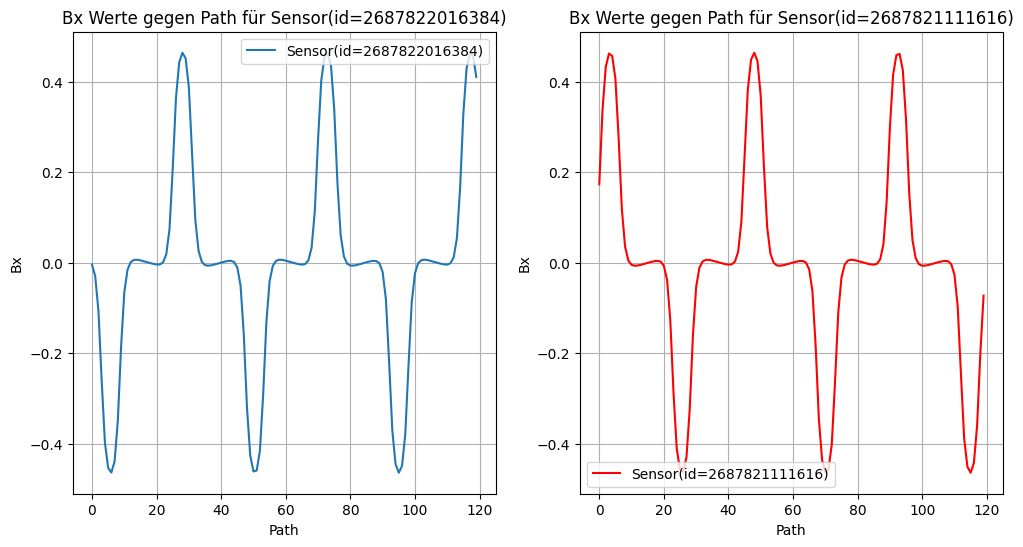

In [19]:
import matplotlib.pyplot as plt


# Plotten der 'Bx' Werte gegen 'path' für den ersten Sensor
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(duo_df[duo_df['sensor'] == sensor_1_id]['path'], duo_df[duo_df['sensor'] == sensor_1_id]['Bx'], label=sensor_1_id)
plt.title(f'Bx Werte gegen Path für {sensor_1_id}')
plt.xlabel('Path')
plt.ylabel('Bx')
plt.grid(True)
plt.legend()

# Plotten der 'Bx' Werte gegen 'path' für den zweiten Sensor
plt.subplot(1, 2, 2)
plt.plot(duo_df[duo_df['sensor'] == sensor_2_id]['path'], duo_df[duo_df['sensor'] == sensor_2_id]['Bx'], label=sensor_2_id, color='red')
plt.title(f'Bx Werte gegen Path für {sensor_2_id}')
plt.xlabel('Path')
plt.ylabel('Bx')
plt.grid(True)
plt.legend()

plt.show()


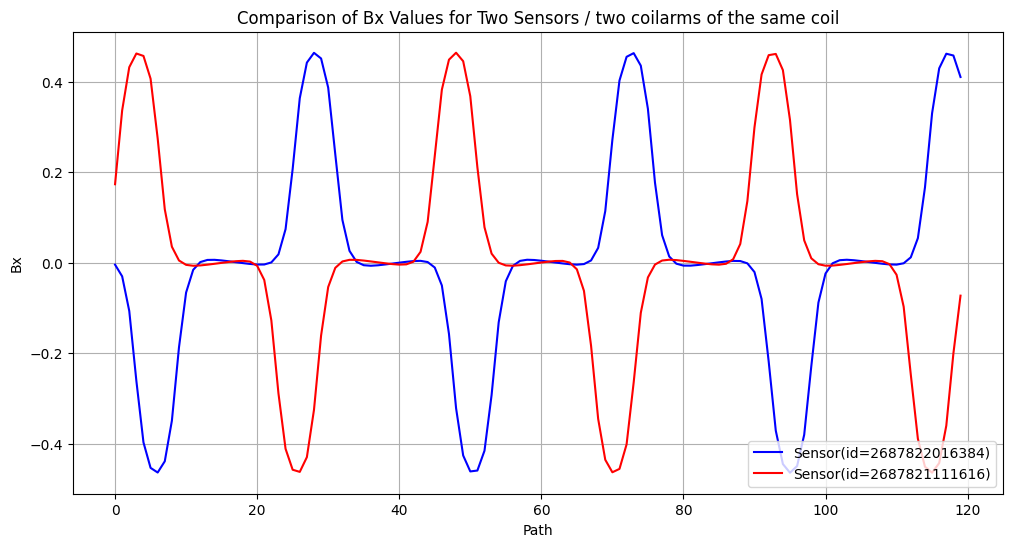

In [20]:
import matplotlib.pyplot as plt


# Plotting the 'Bx' values against 'path' for both sensors in a single plot
plt.figure(figsize=(12, 6))

# Plot for the first sensor
plt.plot(duo_df[duo_df['sensor'] == sensor_1_id]['path'], 
         duo_df[duo_df['sensor'] == sensor_1_id]['Bx'], 
         label=sensor_1_id, 
         color='blue')

# Plot for the second sensor
plt.plot(duo_df[duo_df['sensor'] == sensor_2_id]['path'], 
         duo_df[duo_df['sensor'] == sensor_2_id]['Bx'], 
         label=sensor_2_id, 
         color='red')

# Adding title and labels
plt.title('Comparison of Bx Values for Two Sensors / two coilarms of the same coil')
plt.xlabel('Path')
plt.ylabel('Bx')

# Adding a grid 
plt.grid(True)

# Adding a legend 
plt.legend()

# Displaying the plot
plt.show()



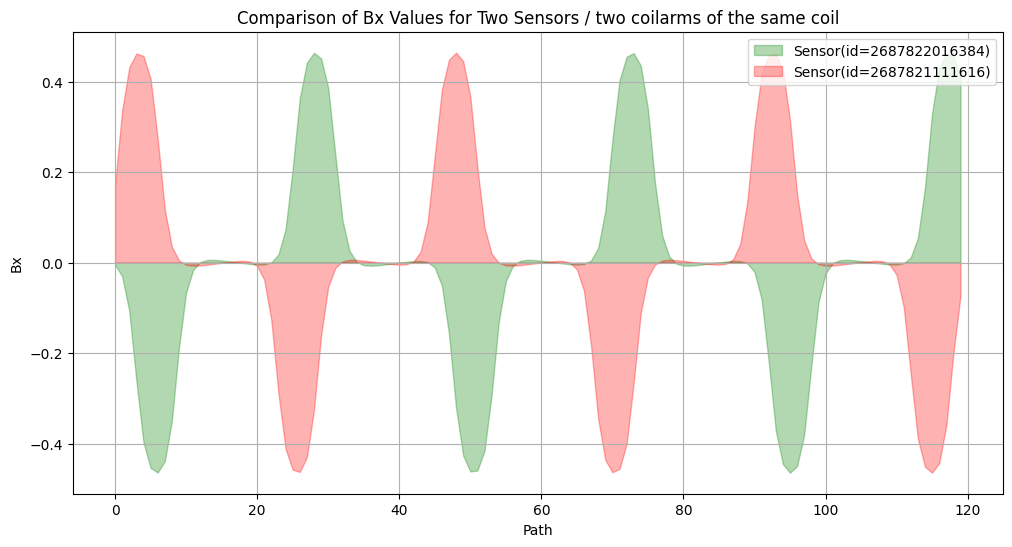

In [21]:
import matplotlib.pyplot as plt

# Plotting 'Bx' values against 'path' for both sensors in a single plot
plt.figure(figsize=(12, 6))

# Plot and fill area for the first sensor
plt.fill_between(duo_df[duo_df['sensor'] == sensor_1_id]['path'], 
                 duo_df[duo_df['sensor'] == sensor_1_id]['Bx'], 
                 label=sensor_1_id, 
                 color='green', 
                 alpha=0.3)

# Plot and fill area for the second sensor
plt.fill_between(duo_df[duo_df['sensor'] == sensor_2_id]['path'], 
                 duo_df[duo_df['sensor'] == sensor_2_id]['Bx'], 
                 label=sensor_2_id, 
                 color='red', 
                 alpha=0.3)

# Adding title and labels
plt.title('Comparison of Bx Values for Two Sensors / two coilarms of the same coil')
plt.xlabel('Path')
plt.ylabel('Bx')

# Grid for better readability
plt.grid(True)

# Adding legend to differentiate between sensors
plt.legend()

# Displaying the plot
plt.show()


In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
#

# interactive ipywidget to  execute locally
# 
def plot_with_vertical_line(position):
    plt.figure(figsize=(12, 6))

    # Plot und Flächenfüllung für den ersten Sensor
    plt.fill_between(duo_df[duo_df['sensor'] == sensor_1_id]['path'], 
                     duo_df[duo_df['sensor'] == sensor_1_id]['Bx'], 
                     label=sensor_1_id, 
                     color='red', 
                     alpha=0.3)

    # Plot und Flächenfüllung für den zweiten Sensor
    plt.fill_between(duo_df[duo_df['sensor'] == sensor_2_id]['path'], 
                     duo_df[duo_df['sensor'] == sensor_2_id]['Bx'], 
                     label=sensor_2_id, 
                     color='green', 
                     alpha=0.3)

    # Hinzufügen einer vertikalen Linie
    plt.axvline(x=position, color='black', linestyle='--')

    # Markieren der Schnittpunkte
    bx_sensor_1 = duo_df[(duo_df['sensor'] == sensor_1_id) & (duo_df['path'] == position)]['Bx'].values[0]
    bx_sensor_2 = duo_df[(duo_df['sensor'] == sensor_2_id) & (duo_df['path'] == position)]['Bx'].values[0]

    plt.scatter([position], [bx_sensor_1], color='red', marker='o', label=f'{sensor_1_id} @ {position}')
    plt.scatter([position], [bx_sensor_2], color='green', marker='o', label=f'{sensor_2_id} @ {position}')

    # Titel und Beschriftungen hinzufügen und Schriftgröße erhöhen
    plt.title('Vergleich der Bx-Werte für zwei Sensoren / zwei Spulenarme der gleichen Spule')
    plt.xlabel('Weg')
    plt.ylabel('Bx')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Berechnung der Bx-Werte an den Schnittpunkten und Summierung der Beträge
    total_abs_sum = abs(bx_sensor_1) + abs(bx_sensor_2)
    print(f"Bx Wert bei {position} für {sensor_1_id}: {bx_sensor_1} mT")
    print(f"Bx Wert bei {position} für {sensor_2_id}: {bx_sensor_2} mT")
    print(f"Summe der Beträge: {total_abs_sum} mT")

# Initialisierung des Widgets für die verschiebbare Linie
slider = widgets.IntSlider(min=duo_df['path'].min(), max=duo_df['path'].max(), step=1, value=49)

# Verbindung des Widgets mit der Plot-Funktion
widgets.interact(plot_with_vertical_line, position=slider)


ModuleNotFoundError: No module named 'matplotlib'

In [23]:
# This program visualizes an axial flux generator with an interactive diagram.
# It uses Matplotlib for drawing and ipywidgets for interactive elements.
# The code generates a central circle and surrounding rectangles representing magnets,
# as well as circular segments symbolizing coil bodies.
# The magnets change their colors to represent different polarities,
# while the circular segments in various shades of gray indicate the phases of the coil body.
# A slider allows the user to dynamically change the rotation of the magnets.
# The representation also includes a legend explaining the significance of the colors and shapes.
# Author: Flash
# Contact: flash.online@tuta.io

# based on 
# Design of an axial flux permanent magnet wind power generator
#    DOI:10.1049/cp:19971072

# and 

# P. Premaratne1(B) , M. Q. Abdullah1,2 , I. J. Kadhim2 , B. Halloran1 , and P. J. Vial
# Optimization of Low-Speed Dual Rotor Axial
# Flux Generator Design Through
# Electromagnetic Modelling and Simulation
# ------------------------------------
# Intelligent Computing
# Theories and Application 
# 17th International Conference, ICIC 2021



import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Parameters for the circle, rectangles, and coil segments
circle_radius = 8.80
circle_center = (0, 0)
rectangle_radius = 17
rectangle_width = 6
rectangle_height = 2
num_rectangles = 16
coil_arm_width = 20

# Parameters for circular segments
num_segments = 12
segment_angle = 360 / num_segments
outer_radius = 43 / 2
inner_radius = 25 / 2

# Shades of gray for different phases
gray_shades = ['#A9A9A9', '#808080', '#696969']  # Three different shades for three phases

# Function to draw rectangles and circle
def draw_rectangles(angle):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw central circle
    circle = plt.Circle(circle_center, circle_radius, color='grey', fill=False)
    ax.add_artist(circle)

    # Draw coil segments as contours with thick outer lines
    for i in range(num_segments):
        start_angle = i * segment_angle
        gap = 10
        end_angle = start_angle + segment_angle - gap
        gray_shade = gray_shades[i % 3]  # Alternating gray shade
        segment = patches.Wedge(circle_center, outer_radius, start_angle, end_angle, width=outer_radius - inner_radius, facecolor='none', edgecolor=gray_shade, linewidth=coil_arm_width)
        ax.add_patch(segment)

    # Draw rectangles representing magnets
    for i in range(num_rectangles):
        rectangle_angle = i * (360 / num_rectangles) + angle
        angle_rad = np.radians(rectangle_angle)
        center_x = rectangle_radius * np.cos(angle_rad)
        center_y = rectangle_radius * np.sin(angle_rad)
        rect_x = center_x - rectangle_width / 2 * np.cos(angle_rad) + rectangle_height / 2 * np.sin(angle_rad)
        rect_y = center_y - rectangle_width / 2 * np.sin(angle_rad) - rectangle_height / 2 * np.cos(angle_rad)
        color = 'red' if i % 2 == 0 else 'green'
        rectangle = patches.Rectangle((rect_x, rect_y), rectangle_width, rectangle_height, angle=rectangle_angle, color=color)
        ax.add_patch(rectangle)

    # Axis settings
    ax.set_xlim(-circle_radius*2.5, circle_radius*2.5)
    ax.set_ylim(-circle_radius*2.5, circle_radius*2.5)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)

    # Add legend
    red_rectangle = patches.Patch(color='red', label='Magnet - Positive Pole')
    green_rectangle = patches.Patch(color='green', label='Magnet - Negative Pole')
    gray_segment1 = patches.Patch(color=gray_shades[0], label='Coil Body - Phase 1')
    gray_segment2 = patches.Patch(color=gray_shades[1], label='Coil Body - Phase 2')
    gray_segment3 = patches.Patch(color=gray_shades[2], label='Coil Body - Phase 3')
    ax.legend(handles=[red_rectangle, green_rectangle, gray_segment1, gray_segment2, gray_segment3], loc='upper right')

    # Set title
    ax.set_title('Cross-section - Axial Flux Generator with 16 Magnets and 12 Coil Bodies')

    plt.show()

# Create a slider for rotation
slider = widgets.FloatSlider(min=0, max=360, step=0.05, value=44, description='Rotation') # FloatSlider for rotating steps

# Display the slider and link it to the drawing function
widgets.interactive(draw_rectangles, angle=slider)


interactive(children=(FloatSlider(value=44.0, description='Rotation', max=360.0, step=0.05), Output()), _dom_c…

In [24]:
#
#
#       !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! WARNING !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#
#
#


In [25]:
# While analyzing magnetic properties using the DataFrame,
# there are problems displaying all the contents of the DataFrame all together together.
# The values from the same dataframe above are changing in the further code and the behavior cannot be explained at the moment.
# Seek assistance from the community.

# UPDATE MAGPYLIB to v.50 !
# Upcoming Soon: New Version 5 with breaking changes.
# We recommended to pin your dependencies to magpylib>=4.5<5 to avoid breaking changes! (see details) ⚠️
# https://github.com/magpylib/magpylib/discussions/647

In [26]:
print(magpy.__version__)


4.5.0


In [27]:
Bxyz_df = pd.read_csv('afpm-gen_Bxyz_dataframe.csv')

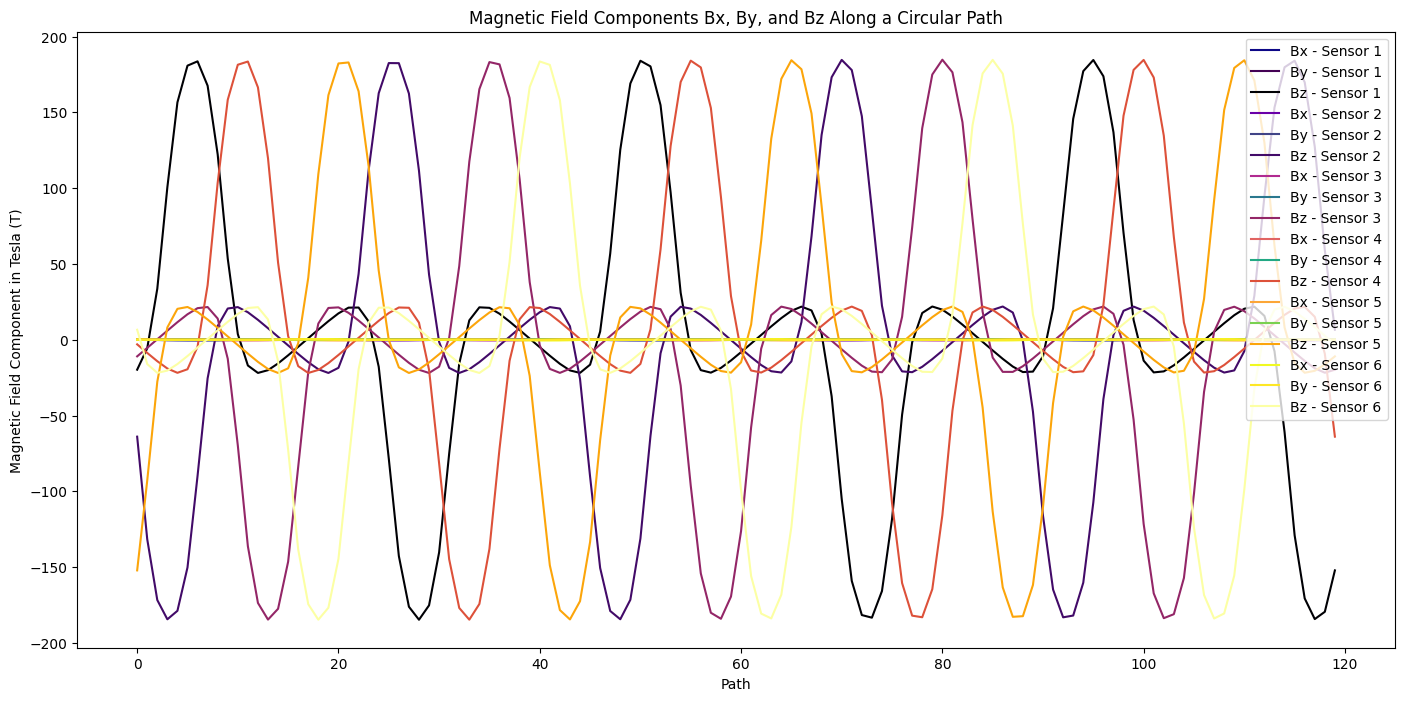

In [28]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Initialize the plot figure
plt.figure(figsize=(17, 8))

# Identify unique sensors within the DataFrame
unique_sensors = Bxyz_df['sensor'].unique()

# Color scheme for plot representation
colormap_bx = cm.plasma(np.linspace(0, 1, len(unique_sensors)))  # Plasma color map for Bx
colormap_by = cm.viridis(np.linspace(0, 1, len(unique_sensors)))  # Viridis color map for By
colormap_bz = cm.inferno(np.linspace(0, 1, len(unique_sensors)))  # Inferno color map for Bz

# Plot data for each sensor
for i, sensor in enumerate(unique_sensors):
    sensor_data = Bxyz_df[Bxyz_df['sensor'] == sensor]
    # Plot Bx with color fill
    plt.plot(sensor_data['path'], sensor_data['Bx'], label=f'Bx - Sensor {i+1}', color=colormap_bx[i])
    plt.fill_between(sensor_data['path'], sensor_data['Bx'], color=colormap_bx[i], alpha=0.1)
    # Plot By
    plt.plot(sensor_data['path'], sensor_data['By'], label=f'By - Sensor {i+1}', color=colormap_by[i])
    # Plot Bz
    plt.plot(sensor_data['path'], sensor_data['Bz'], label=f'Bz - Sensor {i+1}', color=colormap_bz[i])

# Add title and axis labels
plt.title('Magnetic Field Components Bx, By, and Bz Along a Circular Path')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component in Tesla (T)')

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


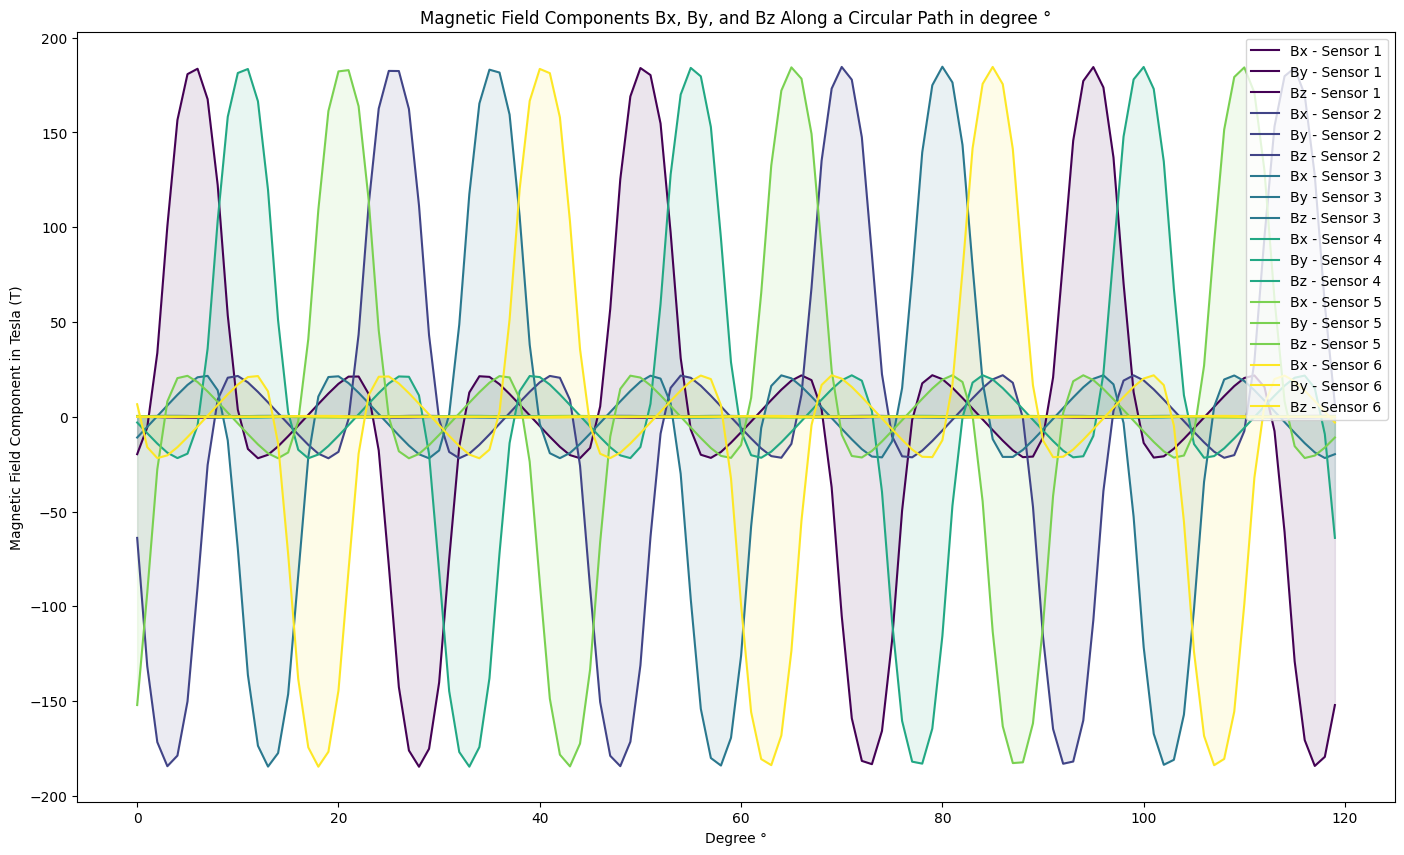

In [29]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Initialize the plot figure
plt.figure(figsize=(17, 10))

# Identify unique sensors
unique_sensors = Bxyz_df['sensor'].unique()

# Color scheme for the plot representation
colormap_bx = cm.viridis(np.linspace(0, 1, len(unique_sensors)))  # Viridis color map for Bx
colormap_by = cm.viridis(np.linspace(0, 1, len(unique_sensors)))  # Viridis color map for By
colormap_bz = cm.viridis(np.linspace(0, 1, len(unique_sensors)))  # Viridis color map for Bz

# Plot data for each sensor
for i, sensor in enumerate(unique_sensors):
    sensor_data = Bxyz_df[Bxyz_df['sensor'] == sensor]
    # Plot Bx with filling
    plt.plot(sensor_data['path'], sensor_data['Bx'], label=f'Bx - Sensor {i+1}', color=colormap_bx[i])
    plt.fill_between(sensor_data['path'], 0, sensor_data['Bx'], color=colormap_bx[i], alpha=0.1)
    # Plot By with filling
    plt.plot(sensor_data['path'], sensor_data['By'], label=f'By - Sensor {i+1}', color=colormap_by[i])
    plt.fill_between(sensor_data['path'], 0, sensor_data['By'], color=colormap_by[i], alpha=0.1)
    # Plot Bz with filling
    plt.plot(sensor_data['path'], sensor_data['Bz'], label=f'Bz - Sensor {i+1}', color=colormap_bz[i])
    plt.fill_between(sensor_data['path'], 0, sensor_data['Bz'], color=colormap_bz[i], alpha=0.1)

# Add title and axis labels
plt.title('Magnetic Field Components Bx, By, and Bz Along a Circular Path in degree °')
plt.xlabel('Degree °')
plt.ylabel('Magnetic Field Component in Tesla (T)')

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()
